In [10]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
sheet_id = "15ooJmi30BiE3ZhbNsGNG0Ct2gL-tRcoFMbLKLjQGqbU"  # ESO Mat Prices
sheet_name1 = "plans"
sheet_name2 = "patches"
url1 = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name1}"
url2 = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name2}"

# read csvs from google sheets
plans = pd.read_csv(url1)
patches = pd.read_csv(url2)

In [12]:
# remove name column
plans = plans.drop(columns=["Name"])

# rename columns
cols = [
    "Update",
    "Category",
    "Regulus",
    "Bast",
    "Wood",
    "Ochre",
    "Resin",
    "Rune",
    "Wax",
    "Pelt",
]
plans.columns = cols

# replace nan with 0
plans = plans.fillna(0)

In [13]:
# create list of updates
updates = pd.unique(plans["Update"])

# create dataframes for update mat sums and lengths
update_sum = pd.DataFrame()
update_len = pd.DataFrame()

# find total mats needed to craft one of each pattern added per update
for patch in updates:
    mats = plans.loc[plans["Update"] == patch]  # filter plans by patch added
    mats = mats.drop(columns=["Update", "Category"])  # remove unnecessary columns
    mats = mats.reset_index(drop=True)
    mats_sum = mats.sum(
        axis=0, numeric_only=True
    )  # find sum of each mat for update's plans
    update_sum = pd.concat([update_sum, mats_sum], axis=1)  # add mat sums to df

    mats_len = len(mats.index)  # find number of plans added by patch
    mats_len = pd.Series(data=mats_len)  # convert to series
    update_len = pd.concat([update_len, mats_len])  # add number of plans to df

# rename columns
update_sum.columns = updates

# reset index, add total plans to patches df & rename column
update_len.reset_index(inplace=True, drop=True)
patches = pd.concat([patches, update_len], axis=1)
patches = patches.rename(columns={0: "Total Plans"})

# set index & remove any rows with missing data
patches = patches.set_index("Patch")
patches = patches.dropna()

In [14]:
# plot formatting etc

labels = (
    "regulus",
    "bast",
    "wood",
    "ochre",
    "resin",
    "rune",
    "wax",
    "pelt",
)  # wedge labels
colors = {
    "regulus": "#98CABB",
    "bast": "#E9D985",
    "wood": "#ff6d00",
    "ochre": "#C4D9CE",
    "resin": "#eef0d0",
    "rune": "#46B0B1",
    "wax": "#F4B34E",
    "pelt": "#DBE3CE",
}  # wedge colors

pie = {"labeldistance": None, "radius": 1}
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
legend = {
    "facecolor": None,
    "edgecolor": None,
    "fontsize": 8,
    "labelcolor": "#436161",
    "framealpha": 0,
}

subfnt = {"fontsize": 10, "color": "#436161"}
titlefnt = {"fontsize": 12, "color": "#436161", "variant": "small-caps", "y": 0.95}
countfnt = {
    "color": "#436161",
    "horizontalalignment": "center",
    "verticalalignment": "center",
    "alpha": 0.3,
}

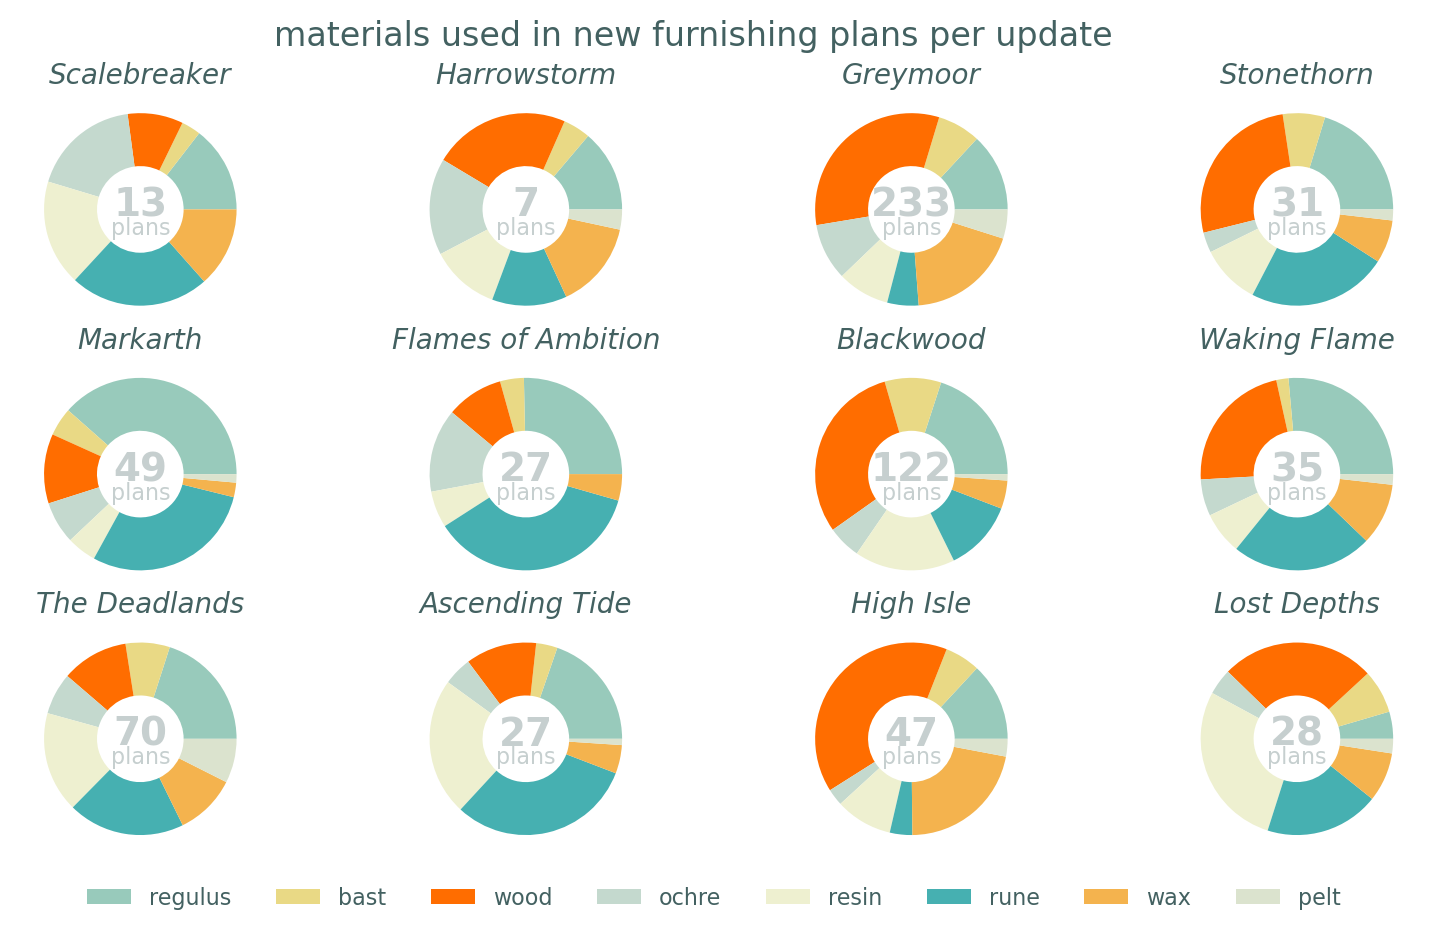

In [15]:
# pie charts for each update
fig, axs = plt.subplots(3, 4, dpi=200, figsize=(10, 5), facecolor="w")
plt.subplots_adjust(hspace=0.1, wspace=-0.02)
fig.suptitle("materials used in new furnishing plans per update", **titlefnt)

for update, ax in zip(updates, axs.ravel()):
    update_sum[update].plot.pie(
        ax=ax,
        labels=labels,
        colors=[colors[key] for key in labels],
        wedgeprops=dict(width=0.55),
        **pie,
    )
    ax.set_title(label=update, style="italic", pad=-4, **subfnt)
    ax.set_ylabel("")
    ax.text(
        x=-0,
        y=0.05,
        s=(str(int(patches.at[update, "Total Plans"]))),
        weight="semibold",
        size=14,
        **countfnt,
    )
    # label for plan count at center of each pie chart
    ax.text(x=-0, y=-0.19, s="plans", size=8, weight="light", **countfnt)

plt.legend(
    loc="lower center",
    ncol=8,
    bbox_to_anchor=(0.01, 0.04, 1, 1),
    bbox_transform=plt.gcf().transFigure,
    **legend,
)

fig.savefig("images/CKy_mats_update.png", dpi=100)

*Materials Used in New Furnishing Plans per Update:* Pie charts showing the materials needed to make one of each new craftable furnishing introduced in an update (starting with Update 23: Scalebreaker), for the purpose of comparing how each update might affect demand for furnishing materials. The total number of plans added per update is shown in the center of each subplot.

In [16]:
# group by category and find the sum of each, & swap df rows/columns
cat_sum = plans.groupby(["Category"]).sum()
cat_sum = cat_sum.transpose()

# get unique category names and sort alphabetically
categories = pd.unique(plans["Category"])
categories.sort()

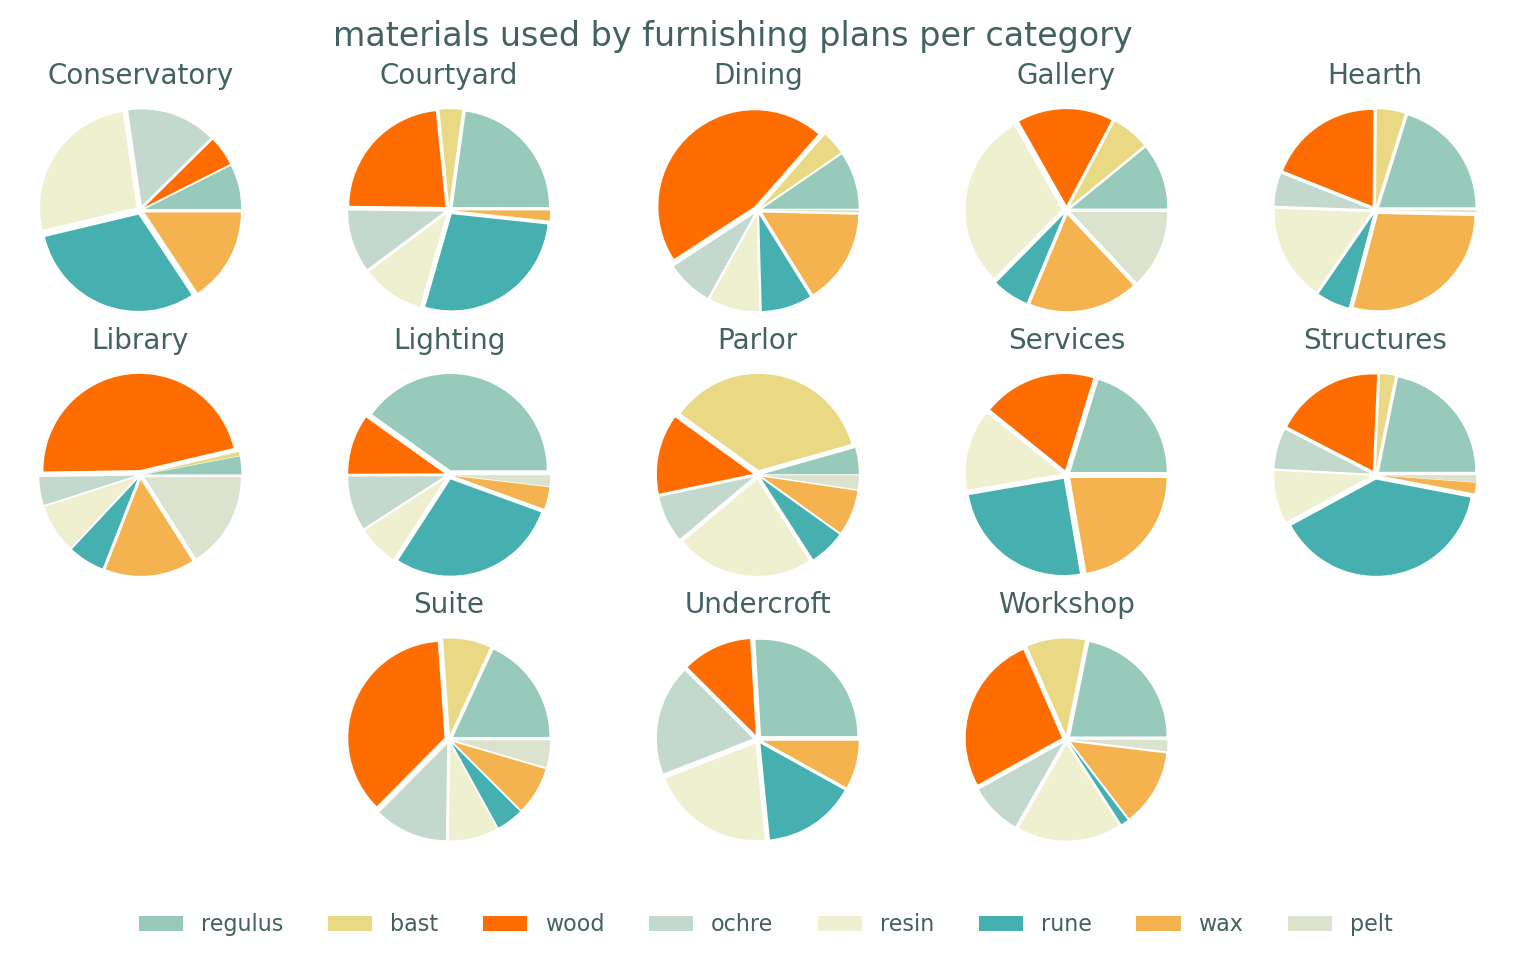

In [17]:
fig, axs = plt.subplots(3, 5, dpi=200, figsize=(10, 5), facecolor="w")
plt.subplots_adjust(hspace=0.1, wspace=-0.02)
fig.suptitle("materials used by furnishing plans per category", **titlefnt)

# make a pie chart for each category's materials
for type, ax in zip(categories, axs.ravel()):
    cat_sum[type].plot.pie(
        ax=ax,
        labels=labels,
        explode=explode,
        colors=[colors[key] for key in labels],
        **pie,
    )
    ax.set_title(label=type, pad=-4, **subfnt)
    ax.set_ylabel("")

axs[2][2].legend(loc="lower center", bbox_to_anchor=(-0.75, -0.4), ncol=8, **legend)

second = axs[2][1].get_position()
third = axs[2][2].get_position()
fourth = axs[2][3].get_position()

# move last row of plots 1 space to the right
axs[2][0].set_position(second)
axs[2][1].set_position(third)
axs[2][2].set_position(fourth)

# remove empty plots
fig.delaxes(axs[2][3])
fig.delaxes(axs[2][4])

fig.savefig("images/CKy_mats_cat.png", dpi=100)

*Materials Used by Furnishing Plans per Category:* Pie charts showing mats used by all plans added from Scalebreaker to Lost Depths, sorted by furnishing type.

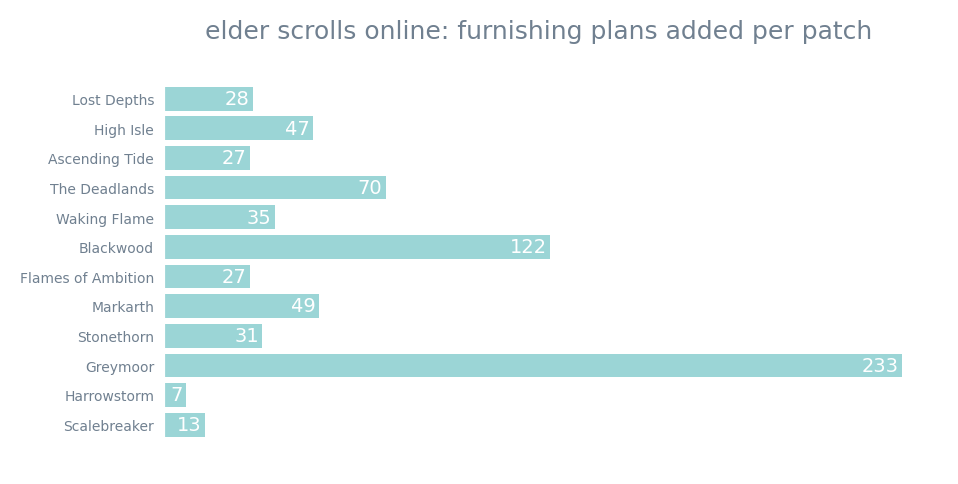

In [18]:
# create a horizontal bar chart of the number of plans released per patch
fig, ax = plt.subplots(dpi=200, figsize=(5, 2.5), facecolor="w")
fig.suptitle(
    "elder scrolls online: furnishing plans added per patch", c="slategrey", size=9
)

x = patches.index
y = patches["Total Plans"]

ax.barh(x, y, align="center", color="#58babb", alpha=0.6)
ax.tick_params(axis="x")
ax.tick_params(axis="y", labelsize=5, labelcolor="slategrey", size=0)
ax.get_xaxis().set_visible(False)

# hide spines
for spine in ax.spines.values():
    spine.set_edgecolor("w")

n = 0
for i in range(len(y)):
    ax.text(
        x=(y[n] - 1),
        y=n,
        s=str(int(y[n])),
        c="w",
        size=7,
        ha="right",
        va="center",
        weight=500,
    )
    n = n + 1